In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import scipy.stats as stat
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
import pickle
from sklearn.metrics import *
import pandas as pd

In [2]:
from dual_model_with_transfer import dual_model_sudden, dual_model_gradual
from single_model_with_transfer import model_sudden, model_gradual

In [3]:
# read fit values
fits_single = pickle.load(open('fit_single_bound_with_transfer.pickle', 'rb'))
fits_dual = pickle.load(open('fit_dual_bound_with_transfer.pickle', 'rb'))
fits_single_model_recovery = pickle.load(open('params/fit_single_bound_with_transfer_model_recovery.pickle', 'rb'))
fits_dual_model_recovery = pickle.load(open('params/fit_dual_bound_with_transfer_model_recovery.pickle', 'rb'))

curvatures_smooth = pickle.load(open('curvatures_smooth.pickle', 'rb'))
curvatures_smooth = curvatures_smooth/90.0
curvatures = pickle.load(open('curvatures.pickle', 'rb'))

In [9]:
def plot_data_vs_fits_dual(curvatures_smooth, Af, Bf, As, Bs):
    plt.figure(figsize = (20, 10))
    errors_predict = np.zeros((60, 704))
    fast = np.zeros((60, 704))
    slow = np.zeros((60, 704))
    rotation_est = np.zeros((60, 704))
    corr_coef = np.zeros(60)
    for participant in range(60):
        if participant % 4 == 0 or participant%4 == 1:
            errors_predict[participant], rotation_est[participant], fast[participant], slow[participant] = dual_model_sudden(704, Af[participant], Bf[participant], As[participant], Bs[participant])
            corr_coef[participant] = np.ma.corrcoef(errors_predict[participant], np.ravel(curvatures_smooth[participant])[64:])[0, 1]
        else:    
            errors_predict[participant], rotation_est[participant], fast[participant], slow[participant] = dual_model_gradual(704, Af[participant], Bf[participant], As[participant], Bs[participant])
            corr_coef[participant] = np.ma.corrcoef(errors_predict[participant], np.ravel(curvatures_smooth[participant])[64:])[0, 1]

    fig, ax = plt.subplots(4, dpi = 300, sharex = True, constrained_layout = True, figsize = (25, 15))
    plt.setp(ax, ylim=(-1, 100))
    legend_size = 15
    for participant in range(4):
        if participant%4 == 0  or participant%4 == 1:
            #plt.plot(np.nanmean(errors_predict[participant::4], axis = 0))
            l1, = ax[participant].plot(np.nanmean(rotation_est[participant::4], axis = 0))
            l2, = ax[participant].plot(np.nanmean(fast[participant::4], axis = 0))
            l3, = ax[participant].plot(np.nanmean(slow[participant::4], axis = 0))
            l4, = ax[participant].plot(np.append(np.ravel(np.nanmean(90 - curvatures_smooth[participant::4], axis = 0)[1:-1]), np.ravel(np.nanmean(curvatures_smooth[participant::4], axis = 0)[11])))
            ax[participant].legend([l1, l2, l3, l4], ['Rotation Est', 'Fast Est', 'Slow Est', 'Rotation Est Data'], prop={'size': legend_size})
        else:
            l1, = ax[participant].plot(np.nanmean(rotation_est[participant::4], axis = 0))
            l2, = ax[participant].plot(np.nanmean(fast[participant::4], axis = 0))
            l3, = ax[participant].plot(np.nanmean(slow[participant::4], axis = 0))
            cs = np.zeros((704))
            csm = np.nanmean(curvatures_smooth[participant::4], axis = 0)
            for i in range(9):
                cs[i*64:(i+1)*64] = (i+1)*10 - csm[i+1]
            cs[576:640] = 90 - csm[10]
            cs[640:] = csm[11]
            l4, = ax[participant].plot(cs)
            #plt.plot(np.append(np.ravel(np.nanmean(90 - curvatures_smooth[participant::4], axis = 0)[1:-1]), -np.ravel(np.nanmean(curvatures_smooth[participant::4], axis = 0)[11])))
            ax[participant].legend([l1, l2, l3, l4], ['Rotation Est', 'Fast Est', 'Slow Est', 'Rotation Est Data'], prop = {'size' : legend_size})


        ax[participant].plot(np.zeros(704), color = 'black')
        ax[0].set_ylabel('Sudden \n Speed', fontsize = 15)
        ax[1].set_ylabel('Sudden \n Accuracy', fontsize = 15)
        ax[2].set_ylabel('Gradual \n Speed', fontsize = 15)
        ax[3].set_ylabel('Gradual \n Accuracy', fontsize = 15)
    fig.suptitle('Dual Model Predictions', fontsize = 20)
    return corr_coef


array([0.32212977, 0.57257524, 0.40468102, 0.52153352, 0.3156315 ,
       0.37557958, 0.66728034, 0.60446868, 0.29953585, 0.52613591,
       0.5900492 , 0.55484614, 0.4854962 , 0.55773913, 0.69894709,
       0.58047286, 0.01756669, 0.47090803, 0.3955942 , 0.48924218,
       0.61008048, 0.7051451 , 0.19092181, 0.40743537, 0.29350733,
       0.63563761, 0.3067208 , 0.48987057, 0.33381535, 0.56943306,
       0.51406565, 0.71627846, 0.32422943, 0.49785413, 0.56729654,
       0.54533568, 0.54741392, 0.31790429, 0.44310286, 0.64424049,
       0.81549635, 0.533663  , 0.15435649, 0.41098543, 0.58555493,
       0.46770122, 0.67852778, 0.63080697, 0.58528912, 0.48166901,
       0.38246053, 0.30030151, 0.34839913, 0.25441131, 0.23940711,
       0.53932249, 0.36034841, 0.38784576, 0.45978531, 0.56235896])

<Figure size 1440x720 with 0 Axes>

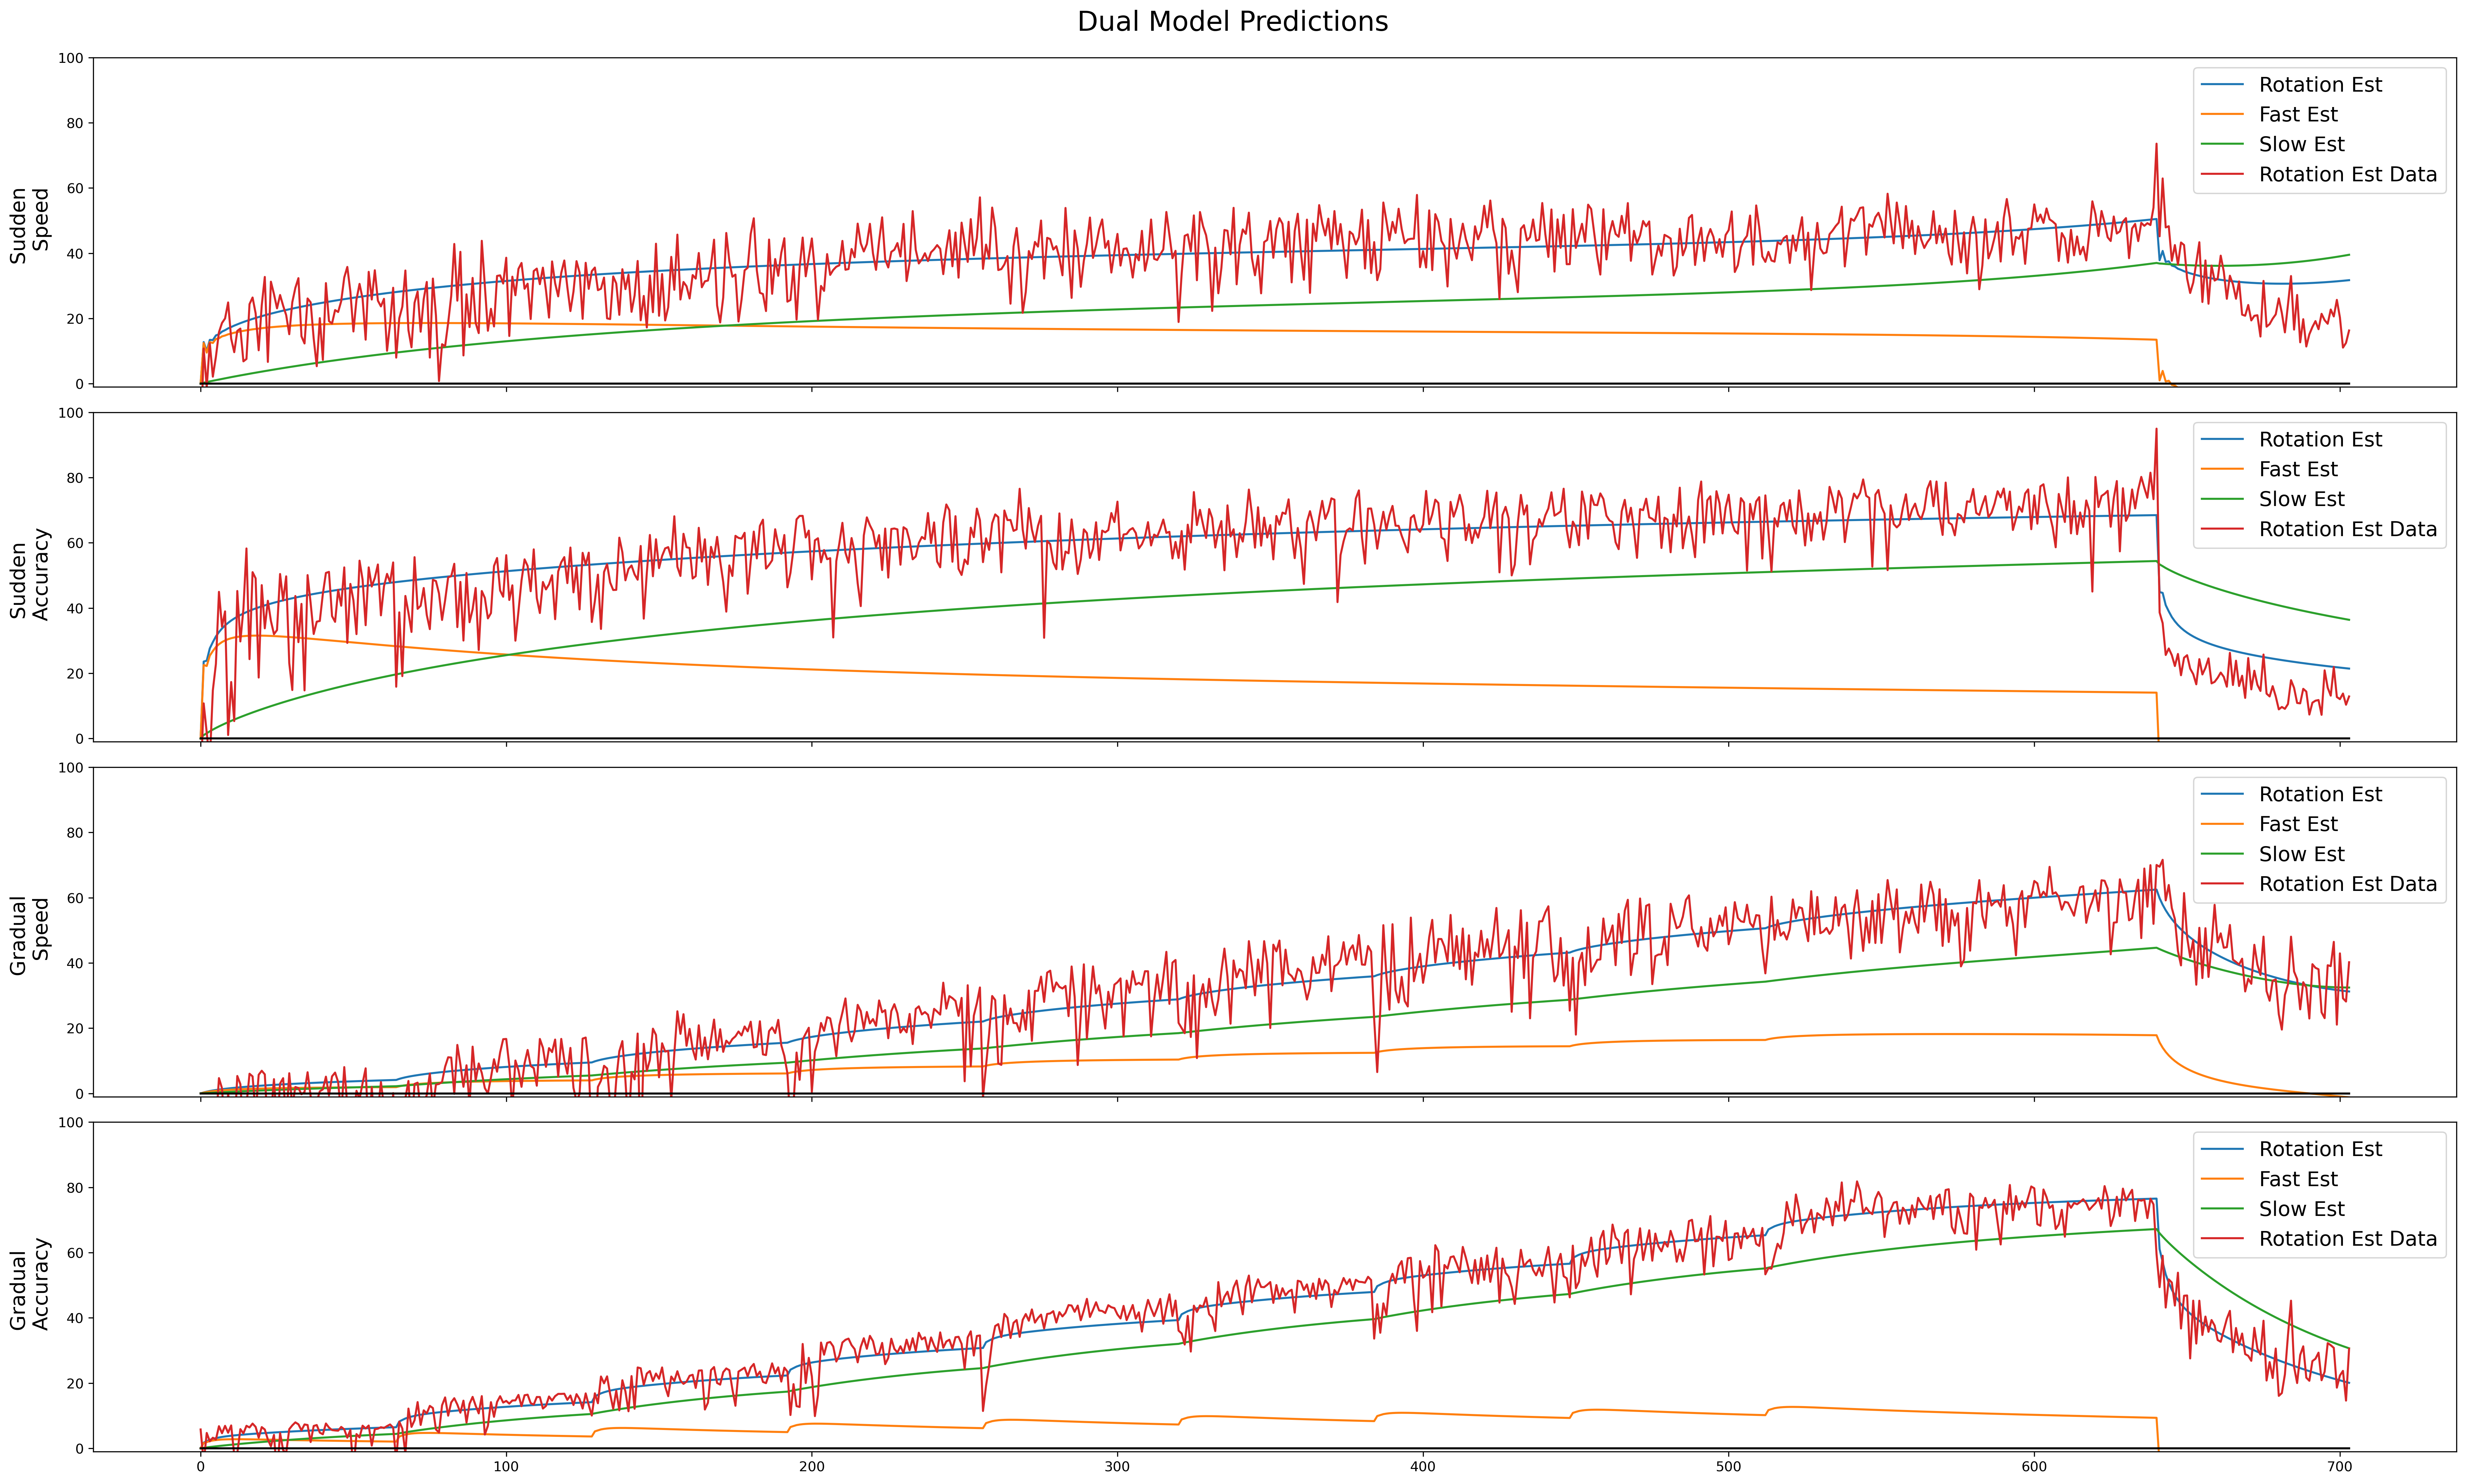

In [10]:
plot_data_vs_fits_dual(curvatures, fits_dual[:, 0], fits_dual[:, 1], fits_dual[:, 2], fits_dual[:, 3])

In [11]:
def plot_data_vs_fits_single(curvatures_smooth, A, B):
    plt.figure(figsize = (20, 10))
    errors_predict = np.zeros((60, 704))
    fast = np.zeros((60, 704))
    slow = np.zeros((60, 704))
    rotation_est = np.zeros((60, 704))
    corr_coef = np.zeros(60)
    for participant in range(60):
        if participant % 4 == 0 or participant%4 == 1:
            errors_predict[participant], rotation_est[participant] = model_sudden(704, A[participant], B[participant])
            corr_coef[participant] = np.ma.corrcoef(errors_predict[participant], np.ravel(curvatures_smooth[participant])[64:])[0, 1]
        else:    
            errors_predict[participant], rotation_est[participant] = model_gradual(704, A[participant], B[participant])
            corr_coef[participant] = np.ma.corrcoef(errors_predict[participant], np.ravel(curvatures_smooth[participant])[64:])[0, 1]

    fig, ax = plt.subplots(4, dpi = 300, sharex = True, constrained_layout = True, figsize = (25, 15))
    plt.setp(ax, ylim=(-1, 100))
    legend_size = 15
    
    for participant in range(4):
        if participant%4 == 0  or participant%4 == 1:
            #plt.plot(np.nanmean(errors_predict[participant::4], axis = 0))
            l1, = ax[participant].plot(np.nanmean(rotation_est[participant::4], axis = 0))
            l4, = ax[participant].plot(np.append(np.ravel(np.nanmean(90 - curvatures_smooth[participant::4], axis = 0)[1:-1]), np.ravel(np.nanmean(curvatures_smooth[participant::4], axis = 0)[11])))
            ax[participant].legend([l1, l4], ['Rotation Est', 'Rotation Est Data'], prop={'size': legend_size})
        else:
            l1, = ax[participant].plot(np.nanmean(rotation_est[participant::4], axis = 0))
            cs = np.zeros((704))
            csm = np.nanmean(curvatures_smooth[participant::4], axis = 0)
            for i in range(9):
                cs[i*64:(i+1)*64] = (i+1)*10 - csm[i+1]
            cs[576:640] = 90 - csm[10]
            cs[640:] = csm[11]
            l4, = ax[participant].plot(cs)
            #plt.plot(np.append(np.ravel(np.nanmean(90 - curvatures_smooth[participant::4], axis = 0)[1:-1]), -np.ravel(np.nanmean(curvatures_smooth[participant::4], axis = 0)[11])))
            ax[participant].legend([l1, l4], ['Rotation Est', 'Rotation Est Data'], prop = {'size' : legend_size})


        ax[participant].plot(np.zeros(704), color = 'black')
        ax[0].set_ylabel('Sudden \n Speed', fontsize = 15)
        ax[1].set_ylabel('Sudden \n Accuracy', fontsize = 15)
        ax[2].set_ylabel('Gradual \n Speed', fontsize = 15)
        ax[3].set_ylabel('Gradual \n Accuracy', fontsize = 15)
    fig.suptitle('Single state model predictions', fontsize = 20)
    return corr_coef


array([0.36242673, 0.55465422, 0.40435171, 0.51204174, 0.31916576,
       0.35149757, 0.60822852, 0.59867313, 0.1178678 , 0.43372162,
       0.58946872, 0.54683242, 0.49060405, 0.54921494, 0.69892431,
       0.56391227, 0.05770344, 0.38592119, 0.39660015, 0.4790987 ,
       0.57229986, 0.67702595, 0.17853317, 0.37904009, 0.31326373,
       0.5486542 , 0.29564537, 0.48956566, 0.29156873, 0.54388437,
       0.51436541, 0.69818896, 0.29679657, 0.47689727, 0.56732318,
       0.50482908, 0.49496751, 0.24679591, 0.44155059, 0.63660806,
       0.81283284, 0.40500878, 0.1546002 , 0.39385094, 0.58674349,
       0.46777077, 0.6816022 , 0.62064875, 0.54147311, 0.38694752,
       0.38090063, 0.29753156, 0.25225901, 0.21746181, 0.21310481,
       0.51167682, 0.37879337, 0.29147161, 0.46002939, 0.51503245])

<Figure size 1440x720 with 0 Axes>

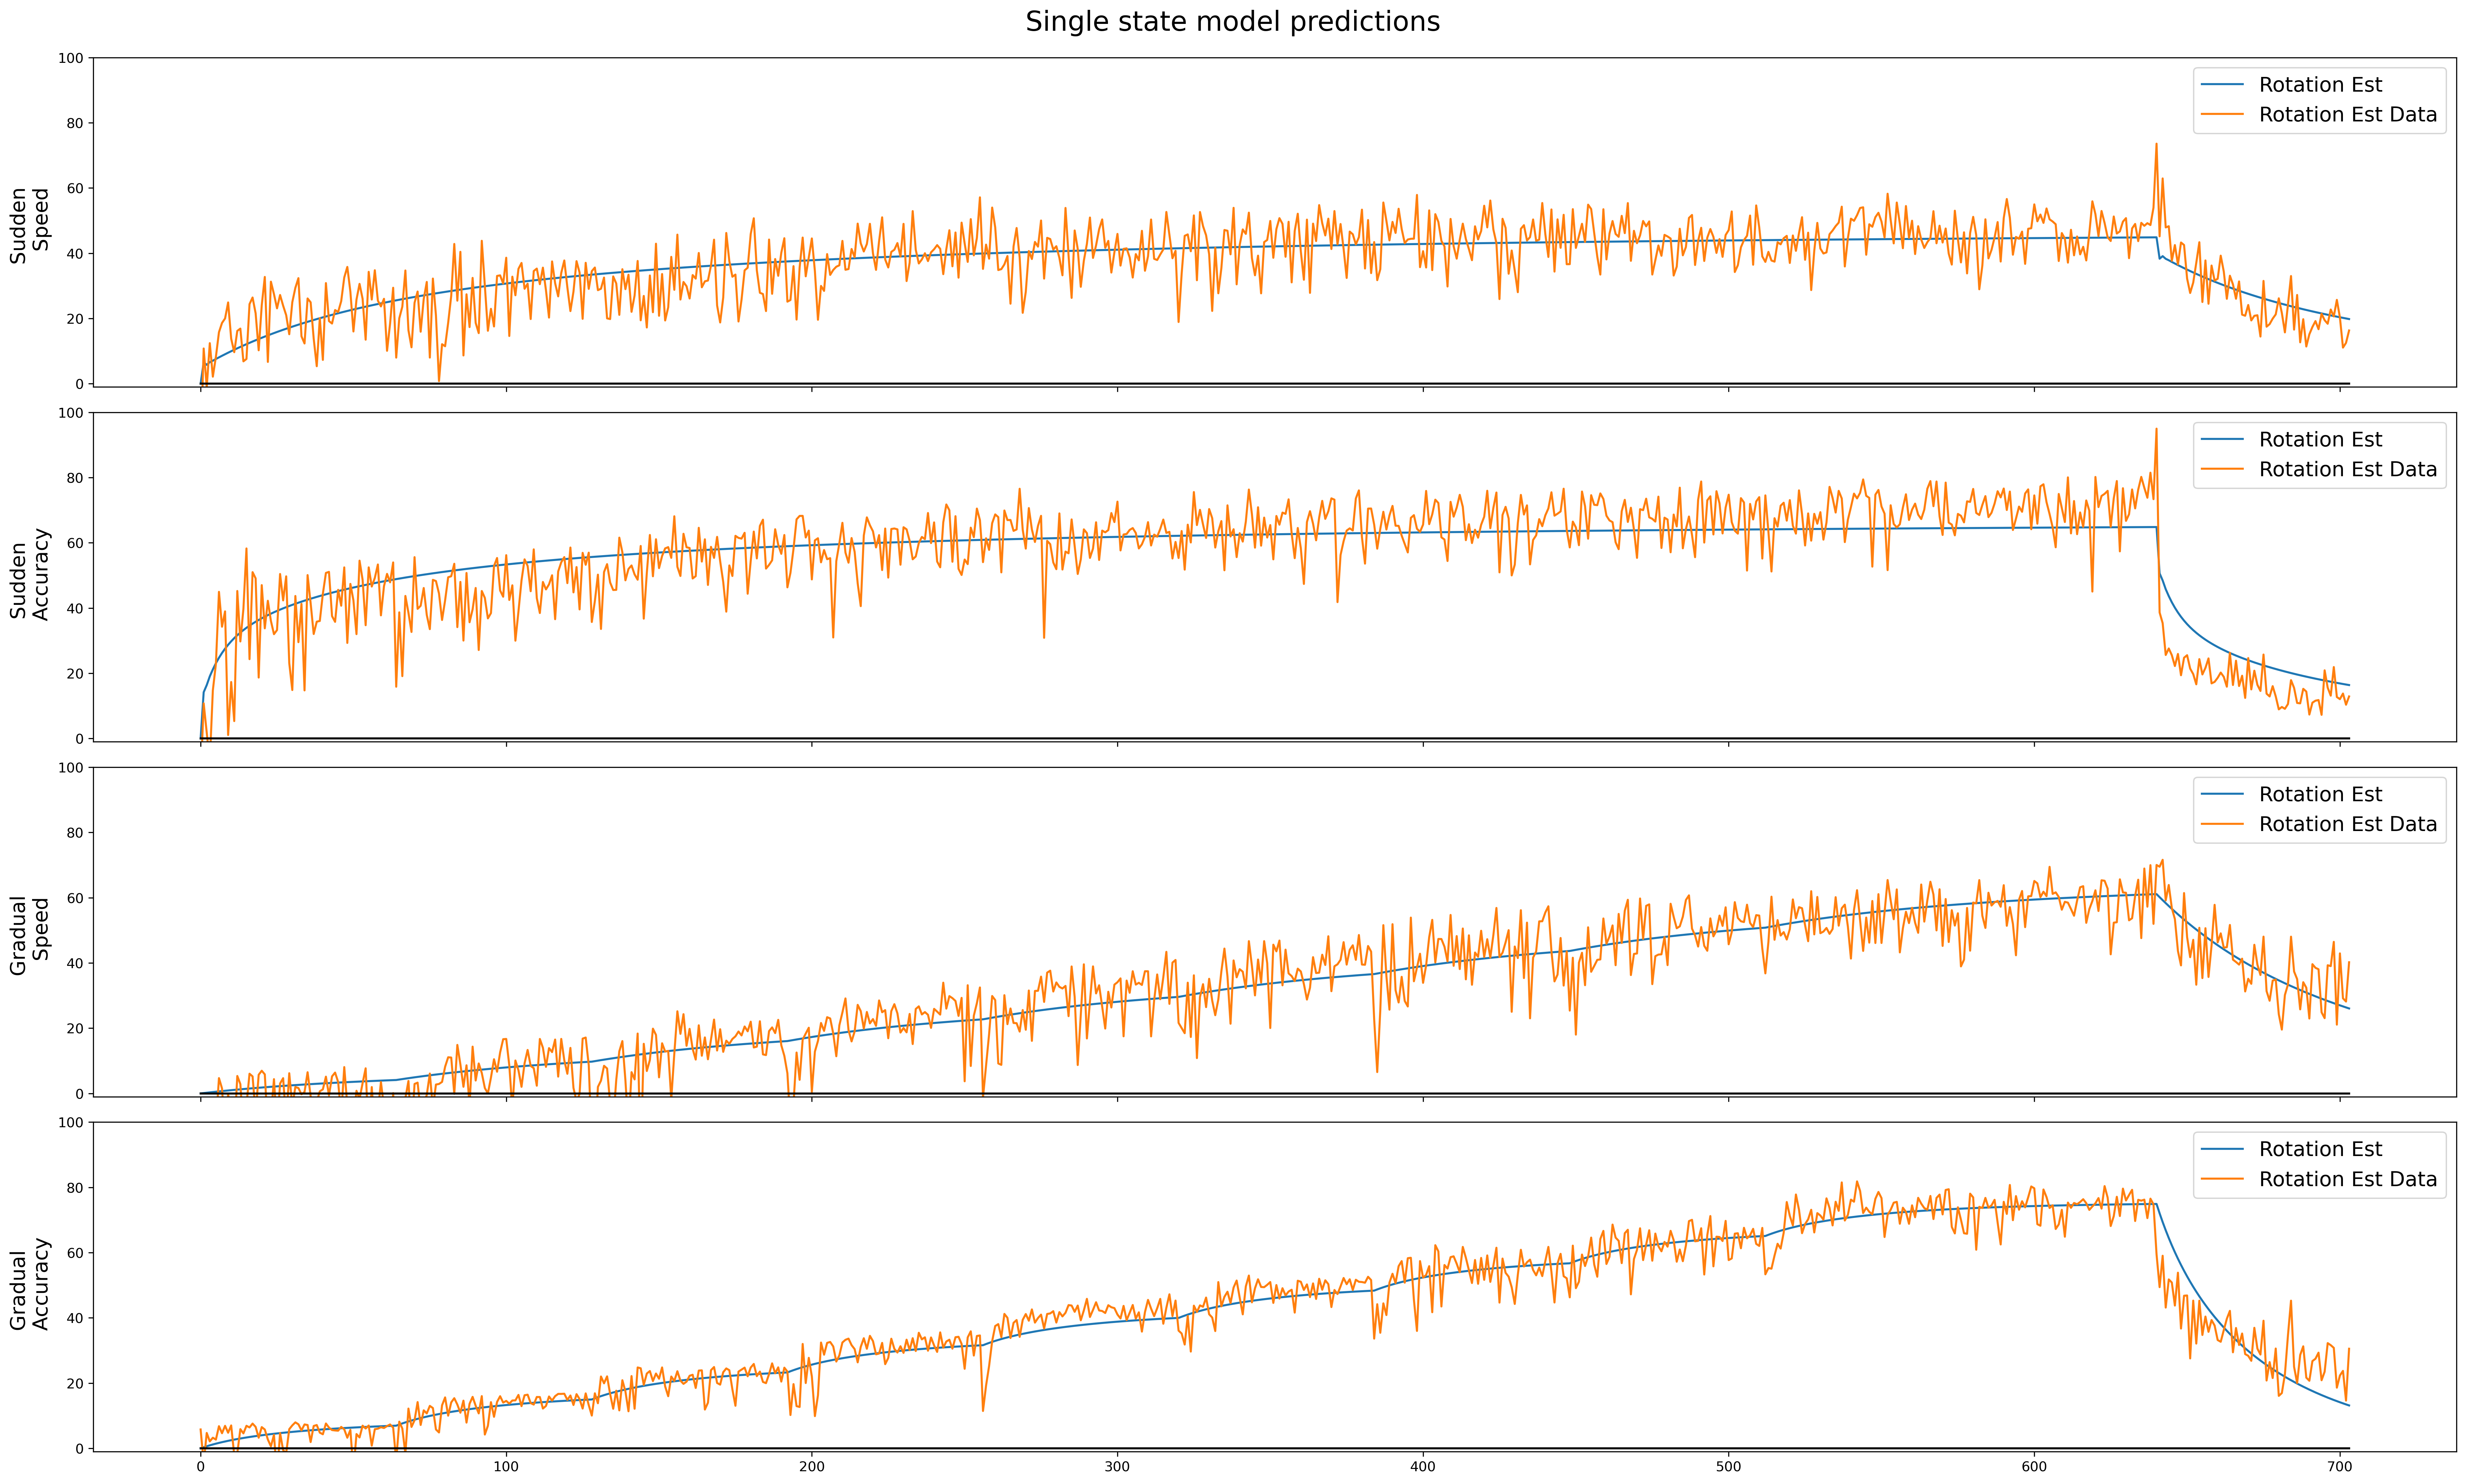

In [13]:
plot_data_vs_fits_single(curvatures, fits_single[:, 0], fits_single[:, 1])

Text(0, 0.5, 'Mean rmse')

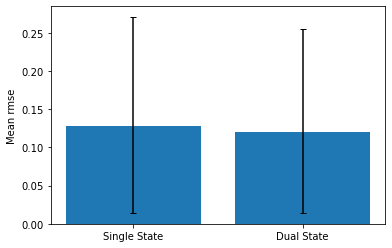

In [43]:
ci_single = stat.t.interval(alpha=0.95, df=59, loc=np.mean(fits_single[0::4, -1]), scale=stat.sem(fits_single[0::4, -1]))
ci_dual = stat.t.interval(alpha=0.95, df=59, loc=np.mean(fits_dual[:, -1]), scale=stat.sem(fits_dual[:, -1]))
plt.bar(('Single State', "Dual State"), [np.mean(fits_single[:, -1]), np.mean(fits_dual[:, -1])], yerr = ([ci_single[0], ci_dual[0]], [ci_single[1], ci_dual[1]]), capsize = 3)
plt.ylabel('Mean rmse')

In [45]:
stat.ttest_ind(fits_single[0::4, -1], fits_dual[0::4, -1])

Ttest_indResult(statistic=0.5169917253071281, pvalue=0.6092219397974497)

In [14]:
model_errors_dual = np.zeros((60, 704))
model_errors_single = np.zeros((60, 704))
model_errors_dual_recovery = np.zeros((60, 704))
model_errors_single_recovery = np.zeros((60, 704))
for participant in range(60):
    if participant%4 == 0 or participant%4 == 1:
        model_errors_dual[participant] = dual_model_sudden(704, fits_dual[participant][0], fits_dual[participant][1], fits_dual[participant][2], fits_dual[participant][3])[0]
        model_errors_single[participant] = model_sudden(704, fits_single[participant][0], fits_single[participant][1])[0]
        model_errors_dual_recovery[participant] = dual_model_sudden(704, fits_dual_model_recovery[participant][0], fits_dual_model_recovery[participant][1], fits_dual_model_recovery[participant][2], fits_dual_model_recovery[participant][3])[0]
        model_errors_single_recovery[participant] = model_sudden(704, fits_single_model_recovery[participant][0], fits_single_model_recovery[participant][1])[0]

    else:
        model_errors_dual[participant] = dual_model_gradual(704, fits_dual[participant][0], fits_dual[participant][1], fits_dual[participant][2], fits_dual[participant][3])[0]
        model_errors_single[participant] = model_gradual(704, fits_single[participant][0], fits_single[participant][1])[0]
        model_errors_dual_recovery[participant] = dual_model_gradual(704, fits_dual_model_recovery[participant][0], fits_dual_model_recovery[participant][1], fits_dual_model_recovery[participant][2], fits_dual_model_recovery[participant][3])[0]
        model_errors_single_recovery[participant] = model_gradual(704, fits_single_model_recovery[participant][0], fits_single_model_recovery[participant][1])[0]
        

In [63]:
mse_dual_groups = np.zeros(4)
mse_single_groups = np.zeros(4)
mse_dual_groups_recovery = np.zeros(4)
mse_single_groups_recovery = np.zeros(4)

for group in range(4):
    mse_dual_groups[group] = mean_squared_error(np.ravel(model_errors_dual[group::4, 640:]), np.ravel(curvatures_smooth[group::4,-1]))
    mse_dual_groups_recovery[group] = mean_squared_error(np.ravel(model_errors_single[group::4]), np.ravel(model_errors_dual_recovery[group::4]))
    
    mse_single_groups[group] = mean_squared_error(np.ravel(model_errors_single[group::4, 640:]), np.ravel(curvatures_smooth[group::4,-1]))
    mse_single_groups_recovery[group] = mean_squared_error(np.ravel(model_errors_dual[group::4]), np.ravel(model_errors_single_recovery[group::4]))
    
mse_duals = mean_squared_error(np.ravel(model_errors_dual[:, 640:]), np.ravel(curvatures_smooth[:, -1]))
mse_singles = mean_squared_error(np.ravel(model_errors_single[:, 640:]), np.ravel(curvatures_smooth[:, -1]))


In [56]:
AIC_single = np.zeros(60)
BIC_single = np.zeros(60)

mse_dual = np.zeros(60)
mse_single = np.zeros(60)


rss_dual = np.sum(model_errors_dual - np.reshape(curvatures[:, 1:], (60, 704)), axis = 1)**2
AIC_dual = 2*4 + np.log(sum(fits_dual[:, -1]))
BIC_dual = np.log(704)*4 + np.log(sum(fits_dual[:, -1]))


rss_single = np.sum(model_errors_single - np.reshape(curvatures[:, 1:], (60, 704)), axis = 1)**2
AIC_single  = 2*2 + np.log(sum(fits_single[:, -1]))
BIC_single = np.log(704)*2 + np.log(sum(fits_single[:, -1]))


In [86]:
mse_dual = mean_squared_error(model_errors_dual[2::4]*90, np.reshape(curvatures_smooth[2::4, 1:]*90, (15, 704)))
mse_single = mean_squared_error(model_errors_single[2::4]*90, np.reshape(curvatures_smooth[2::4, 1:]*90, (15, 704)))


In [87]:
AIC_dual_mse = 2*4 + np.log(mse_dual/(704*15))
AIC_single_mse = 2*2 + np.log(mse_single/(704*15))


In [58]:
AIC_dual

15.176962117800265

In [59]:
AIC_single

11.194983443933705

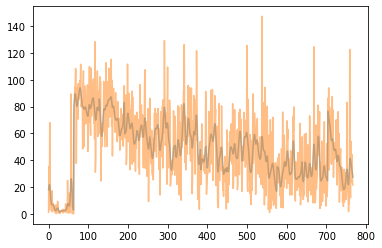

In [114]:
plt.plot(np.ravel(curvatures_smooth[13])*90, alpha = .5)
plt.plot(np.ravel(curvatures[13]), alpha = 0.5)


In [29]:
r2_score(np.ravel(model_errors_dual), np.ravel(curvatures_smooth[:, 1:]))

-1.8435942015295161

In [30]:
r2_score(np.ravel(model_errors_single), np.ravel(curvatures_smooth[:, 1:]))

-1.7878687798910495

In [ ]:
from scipy.ndimage import gaussian_filter1d
curvatures_smooth = gaussian_filter1d(curvatures)
pickle.dump(open)